# Introduction
A recommendation system is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. Recommender systems have become increasingly popular in recent years, and are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. Especially, recommendation system plays a crucial rule in modern music applications. When a user is listening to a song, a music application will recommend some songs. Better recommendation systems will directly result in more users and more using time.

Here's a direct example of music recommendation application:

![spotify image](spotify.png)

The Spotify application will recommend some songs which are related to the current song.



## tutorial content
In this tutorial, we will show how to do some basic recommendation techniques in Python, specifically using pandas, numpy, scipy, matplotlib and scikit-learn.
We will be using data collected from the last.fm data repository from the last.fm: http://www.dtic.upf.edu/~ocelma/MusicRecommendationDataset/lastfm-360K.html. This repository contains about the data about 360k users. This dataset contains <user, artist, plays> tuples (for ~360,000 users) collected from Last.fm API, using the user.getTopArtists() method. For space limit (submit files less than 10MB), we randomly choose first 2000 records from the user's database and choose the play record according to 2000 records.

The pre-processing code can be found in the "pre-processing.ipynb". After the pre-processing, our data has these columns:
    
    [users, artist-name, plays, total_artist_plays]
    
We will cover the following topics in this tutorial:

1. [Install prerequiries](#1)
2. [Loading Data and Plotting](#2)
3. [A Trial to Recommendation System](#3)
4. [Summary and References](#4)

# <span id = "1"></span> Install prerequiries

Before getting started, you'll need to install the various libraries that we will use. You can install Pandas, Numpy and Scikit-Learn on your
own with pip:

    pip install numpy scipy scikit-learn matplotlib
    


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# <span id = "2"></span> Loading Data and Plotting

In [2]:
#shorter floater for display
pd.set_option('display.float_format', lambda x: '%.4f' % x)
#read dataset
play_list = pd.read_csv('dataset.csv',
                          header = None, 
                          nrows = 2000,
                          names = ['index','users', 'artist-name', 'plays', 'total_artist_plays'],
                          usecols = ['index','users', 'artist-name', 'plays', 'total_artist_plays'])
play_list = play_list.drop(['index'],axis=1)
play_list = play_list.drop(0,axis=0)
play_list['plays'] = pd.to_numeric(play_list['plays'])
play_list['total_artist_plays'] = pd.to_numeric(play_list['total_artist_plays'])
play_list.head()

,users,artist-name,plays,total_artist_plays
1,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137,25651
2,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099,3704875
3,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897,180391
4,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717,410725
5,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706,90498


In [3]:
#we will do some count for summarize
print("user size {0}".format(play_list['users'].value_counts().size))
print("artist-name size {0}".format(play_list['artist-name'].value_counts().size))
print(play_list['total_artist_plays'].describe())

user size 42
artist-name size 1505
count       1999.0000
mean     2196503.6273
std      4083922.3701
min           14.0000
25%        99387.5000
50%       610902.0000
75%      2475074.5000
max     30466827.0000
Name: total_artist_plays, dtype: float64


From the summary we can see, we have 42 users in our dataset, and 1505 total artists in our datasets. Moreover, for plays of total_artists, the maximum number is 30466827, which is about 2000000 times of the minimal number 14.

In [4]:
artist_name = play_list['artist-name']
total_artist_plays = play_list['total_artist_plays']
artist_table = pd.concat([artist_name,total_artist_plays],axis=1)
artist_table = artist_table.drop_duplicates()
artist_table = artist_table.sort_values(by=['total_artist_plays'],ascending=False)
artist_table.head()

,artist-name,total_artist_plays
258,the beatles,30466827
222,radiohead,27426234
63,coldplay,16686772
281,pink floyd,15943557
299,metallica,15481852


In [5]:
artist_table = artist_table.sort_values(by=['total_artist_plays'],ascending=True)
artist_table.head()

,artist-name,total_artist_plays
159,rock universal,14
1111,otklonenie,34
1714,jay alansky,40
694,ambassadöör,55
489,nubreed & luke chable,95


As shown above, Most played artists are: the Beatles, Radiohead and Coldplay and the least played artists are rock universal, otklonenie and jay Alansky.

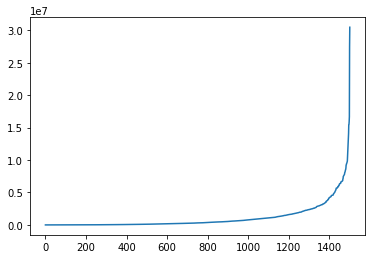

In [6]:
#some visualization of the total artist play plot
plt.plot(np.sort(play_list['total_artist_plays'].unique()))
plt.show()

From the figure, we can easily see that, in these 2000 records, the play time records of different artists are very similar to a "long tail" distribution. It means that most people will listen to same artists, and every person will listen to some specific artists, which makes the recommendation system very difficult. 

username 00000c289a1829a808ac09c00daf10bc3c4e223b
username 00001411dc427966b17297bf4d69e7e193135d89
username 00004d2ac9316e22dc007ab2243d6fcb239e707d
username 000063d3fe1cf2ba248b9e3c3f0334845a27a6bf
username 00007a47085b9aab8af55f52ec8846ac479ac4fe
username 0000c176103e538d5c9828e695fed4f7ae42dd01
username 0000ee7dd906373efa37f4e1185bfe1e3f8695ae
username 0000ef373bbd0d89ce796abae961f2705e8c1faf
username 0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20


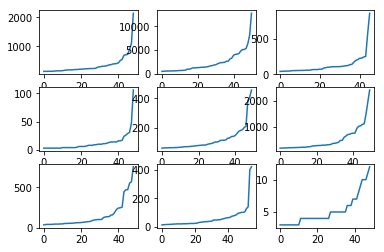

In [7]:
#take an user as example, check his play list
play_list_user = play_list.groupby('users')
now_iter = 1
for name, group in play_list_user:
    print("username {0}".format(name))
    plt.subplot(3,3,now_iter)
    plt.plot(np.sort(group['plays']))
    now_iter +=1
    if now_iter > 9: 
        break

It is also interesting to see that when we use the random nine users as the play time records of different artists. The distributions are also very similar to a "long tail" distribution. It means for a single person, he will listen to popular artists with the most times, and some particular artists with few times, which also makes the recommendation system very difficult. 

# <span id = "3"></span> A Trial to Recommendation System

In this section, we will provide some basic tutorials and trials on recommendation systems. 
1. Item-Based Collaborative Filtering

## Item-Based Collaborative Filtering
In this section, we will use some basic techniques to try item based collabtive filtering, i.e., artist based recommendation.

### Data Preprocessing

Before we conduct real collaborative filtering, we need to prepare some preprocessing tasks for the recommendation task.
In the previous DataFrame, we use "user" or "index" as the index. However, we need to recommend artists to users. So we will take "artist-name" as the new index of the new DataFrame.

In [8]:
##reshape raw DataFrame into new DataFrame
artist_df = play_list.pivot(index = 'artist-name', columns = 'users', values = 'plays').fillna(0)
artist_df.head()

users,00000c289a1829a808ac09c00daf10bc3c4e223b,00001411dc427966b17297bf4d69e7e193135d89,00004d2ac9316e22dc007ab2243d6fcb239e707d,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,00007a47085b9aab8af55f52ec8846ac479ac4fe,0000c176103e538d5c9828e695fed4f7ae42dd01,0000ee7dd906373efa37f4e1185bfe1e3f8695ae,0000ef373bbd0d89ce796abae961f2705e8c1faf,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,0001399387da41d557219578fb08b12afa25ab67,...,000532f6886f086f61037acd896828f0b5b36bf2,0005937bb7e8b1992d94b493519e216317f71685,0005a18022e9a3df17694fe19f5b90edadda7953,0005fb9cb3bb0c4c89fe715630cc9dee91d1dadf,00065b397ff3c9ac3ef5e2b58f96c1284265bdc1,0006e742911b22c8f275674c67b600bf2434f88d,0006e9adc35981f2d066e523596092207b723fcb,0006f849044a98f8db4ac7f83e2881de499b68db,000701c3c006b091990162635b36b008c504c6a7,000710d4dff11af267edd2f70bf54e7678bdd729
artist-name,,,,,,,,,,,,,,,,,,,,,
!!!,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,730.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
16 horsepower,0.0000,0.0000,225.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2 many dj's,0.0000,0.0000,0.0000,0.0000,0.0000,647.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
20/20,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2pac,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [9]:
#counting the non-zero elements in the new generated dataframe
non_zero_elements = artist_df.astype(bool).sum(axis=1).sum(axis=0)
sparsity = (non_zero_elements + 0.0)/ artist_df.size * 100
print("Sparsity is {0}".format(100 - sparsity))

Sparsity is 96.8375257079576


You can easily see that 96% of the matrix is filled with 0, It will bring the huge difficulty to our recommendation system.

### <span id = "3"></span> Nearest Neighbor Recommendation
Since we randomly choose a small subset of the original last.fm 360K dataset, the data is extremely sparse. For better illustration, we use a fixed artist to show the difference and answer.

In [10]:
from sklearn.neighbors import NearestNeighbors

def query_answer(artist_df,model_knn):
    query_index = 895
    distances, indices = model_knn.kneighbors(artist_df.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 5)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(artist_df.index[query_index]) )
        else:
            print('{0}: {1}, distance {2}:'.format(i, artist_df.index[indices[0][i]], distances[0][i]) )
    print("")
model_knn_cosine = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_cosine.fit(artist_df)
print("With Cosine Metric:")
query_answer(artist_df,model_knn_cosine)


With Cosine Metric:
Recommendations for metallica:

1: megadeth, distance 0.07347315744735516:
2: ozzy osbourne, distance 0.08354499232021051:
3: asa, distance 0.08354499232021051:
4: stam1na, distance 0.08354499232021051:



With the cosine metric, we can get the recommendation result as:
1. megadeth, distance 0.07347315744735516:
2. ozzy osbourne, distance 0.08354499232021051:
3. asa, distance 0.08354499232021051:
4. stam1na, distance 0.08354499232021051:
In the next, we will try to explore different metrics.

In [11]:
#euclidean metric 
model_knn_euc = NearestNeighbors(metric = 'euclidean', algorithm = 'brute')
model_knn_euc.fit(artist_df)
print("With Euclidean Metric:\n")
query_answer(artist_df,model_knn_euc)
#cityblock metric 
model_knn_city = NearestNeighbors(metric = 'cityblock', algorithm = 'brute')
model_knn_city.fit(artist_df)
print("With CityBlock Metric:\n")
query_answer(artist_df,model_knn_city)
#minkowski metric
model_knn_minkowski = NearestNeighbors(metric = 'minkowski', algorithm = 'brute')
model_knn_minkowski.fit(artist_df)
print("With Minkowski Metric:\n")
query_answer(artist_df,model_knn_minkowski)

With Euclidean Metric:

Recommendations for metallica:

1: bob marley & the wailers, distance 245.40986125255847:
2: megadeth, distance 288.5948717493088:
3: ac/dc, distance 290.7077570344486:
4: trivium, distance 308.3682863071363:

With CityBlock Metric:

Recommendations for metallica:

1: megadeth, distance 489.0:
2: bob marley & the wailers, distance 498.0:
3: trivium, distance 571.0:
4: stam1na, distance 627.0:

With Minkowski Metric:

Recommendations for metallica:

1: bob marley & the wailers, distance 245.40986125255847:
2: megadeth, distance 288.5948717493088:
3: ac/dc, distance 290.7077570344486:
4: trivium, distance 308.3682863071363:



With both l1 and l2 metric, we can get different recommendation results above.

With Euclidean Metric:

Recommendations for metallica:

1. bob marley & the wailers, distance 245.40986125255847:
2. megadeth, distance 288.5948717493088:
3. ac/dc, distance 290.7077570344486:
4. trivium, distance 308.3682863071363:

With CityBlock Metric:

Recommendations for metallica:

1. megadeth, distance 489.0:
2. bob marley & the wailers, distance 498.0:
3. trivium, distance 571.0:
4. stam1na, distance 627.0:

Generally speaking, when using l1 and l2 metric, the recommendation results have massive difference with the cosine distance. It is due to that the l1 and l2 metric do not consider the length of vectors. Moreover, when the data matrix is extremely sparse, the cosine metric should be much better than the l1 and l2 metric.


### Exploring More Over the Preprocessing Step

In the last section, we directly transfer the original dataset into the new data frame. In this section, we will provide more experiments on the previous data frame. First, we can ignore the time effect on each artist, i.e., we only record whether an artist is played by the specific user.

In [12]:
#ignore the time effects, only record 0 and 1 on the generated data
artist_df_binary = artist_df.apply(lambda x: np.sign(x))

Then we try to use the same metric to evaluate the performance of the data:

In [13]:
model_knn_cosine = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_cosine.fit(artist_df_binary)
print("With Cosine Metric:")
query_answer(artist_df_binary,model_knn_cosine)
#euclidean metric 
model_knn_euc = NearestNeighbors(metric = 'euclidean', algorithm = 'brute')
model_knn_euc.fit(artist_df_binary)
print("With Euclidean Metric:\n")
query_answer(artist_df_binary,model_knn_euc)
#cityblock metric 
model_knn_city = NearestNeighbors(metric = 'cityblock', algorithm = 'brute')
model_knn_city.fit(artist_df_binary)
print("With CityBlock Metric:\n")
query_answer(artist_df_binary,model_knn_city)
#minkowski metric
model_knn_minkowski = NearestNeighbors(metric = 'minkowski', algorithm = 'brute')
model_knn_minkowski.fit(artist_df_binary)
print("With Minkowski Metric:\n")
query_answer(artist_df_binary,model_knn_minkowski)

With Cosine Metric:
Recommendations for metallica:

1: seal, distance 0.29289321881345254:
2: guns n' roses, distance 0.29289321881345254:
3: natalie imbruglia, distance 0.29289321881345254:
4: megadeth, distance 0.29289321881345254:

With Euclidean Metric:

Recommendations for metallica:

1: seal, distance 1.4142135623730951:
2: guns n' roses, distance 1.4142135623730951:
3: tarot, distance 1.4142135623730951:
4: natalie imbruglia, distance 1.4142135623730951:

With CityBlock Metric:

Recommendations for metallica:

1: seal, distance 2.0:
2: guns n' roses, distance 2.0:
3: tarot, distance 2.0:
4: natalie imbruglia, distance 2.0:

With Minkowski Metric:

Recommendations for metallica:

1: seal, distance 1.4142135623730951:
2: guns n' roses, distance 1.4142135623730951:
3: tarot, distance 1.4142135623730951:
4: natalie imbruglia, distance 1.4142135623730951:



After we binarize the times of played artists, the results become almost same for all 4 metrics. Due to the sparsity issue we have mentioned above, it seems that we can not get good recommendation results for the small subset, we will explore with more data and try to overcome the issue.

### Removing rare artists
As illustrated above, sparsity is an important problem in our dataset. So we can remove some rare artists to reduce sparsity:

In [14]:
popularity_threshold = 40000
play_list_frequent = play_list.query('total_artist_plays >= @popularity_threshold')
play_list_frequent.head()


,users,artist-name,plays,total_artist_plays
2,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099,3704875
3,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897,180391
4,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717,410725
5,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706,90498
6,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691,13547741


In [15]:
artist_df_frequent = play_list_frequent.pivot(index = 'artist-name', columns = 'users', values = 'plays').fillna(0)
model_knn_cosine = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn_cosine.fit(artist_df_frequent)
print("With Cosine Metric:")
query_answer(artist_df_frequent,model_knn_cosine)
model_knn_euc = NearestNeighbors(metric = 'euclidean', algorithm = 'brute')
model_knn_euc.fit(artist_df_frequent)
print("With Euclidean Metric:\n")
query_answer(artist_df_frequent,model_knn_euc)
#cityblock metric 
model_knn_city = NearestNeighbors(metric = 'cityblock', algorithm = 'brute')
model_knn_city.fit(artist_df_frequent)
print("With CityBlock Metric:\n")
query_answer(artist_df_frequent,model_knn_city)

With Cosine Metric:
Recommendations for seal:

1: ratos de porão, distance 0.0013219846332247487:
2: fantômas, distance 0.0013219846332247487:
3: the streets, distance 0.0013219846332247487:
4: penguin cafe orchestra, distance 0.0013219846332247487:

With Euclidean Metric:

Recommendations for seal:

1: penguin cafe orchestra, distance 21.37755832643195:
2: xutos & pontapés, distance 48.75448697299562:
3: paul simon, distance 80.65977932030313:
4: madredeus, distance 143.54441821262157:

With CityBlock Metric:

Recommendations for seal:

1: penguin cafe orchestra, distance 25.0:
2: xutos & pontapés, distance 65.0:
3: paul simon, distance 114.0:
4: madredeus, distance 163.0:



With reduced sparsity, we can get better results with all metrics.

# <span id = "4"></span> Summary and references
This tutorial highlighted a few elements of recommendation systems. 
 1. Recommender System https://en.wikipedia.org/wiki/Recommender_system
 2. last.fm 360K dataset http://www.dtic.upf.edu/~ocelma/MusicRecommendationDataset/lastfm-360K.html